In [1]:
import pandas as pd
import numpy as np
import dash
from dash import dcc, html
import plotly.express as px
df = pd.read_csv('Titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Q_1: Split the Titanic DataFrame df into two parts: df1 (first 500 rows) and df2 (remaining rows). Concatenate them vertically to recreate the original DataFrame.

In [2]:
df1=df.iloc[:209] #the data set only has 418 rows i cant split it into two parts: df1 (first 500 rows)
df2=df.iloc[209:]

In [3]:
print(df1.shape)
print(df2.shape)

(209, 12)
(209, 12)


In [4]:
df_main=pd.concat([df1,df2], axis=0)
df_main

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Q_2: Create a new DataFrame passenger_details with columns PassengerId and Nationality. Perform a left join to merge it with df, keeping all original passengers.

In [5]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
passenger_details=pd.DataFrame({
    'PassengerId':df_main['PassengerId'],
    'Nationality': ['USA', 'UK', 'France', 'Germany'] * 104 + ['Italy', 'Spain'] })
passenger_details

,PassengerId,Nationality
0,892,USA
1,893,UK
2,894,France
3,895,Germany
4,896,USA
...,...,...
413,1305,UK
414,1306,France
415,1307,Germany
416,1308,Italy


In [7]:
merged_on_right=df_main.merge(passenger_details, on=['PassengerId'],how='right')
merged_on_right

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Nationality
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,USA
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,UK
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,France
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Germany
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,UK
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,France
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Germany
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Italy


Q_3 : Group the data by Pclass and Sex, then calculate the average Age and total Fare for each group

In [8]:
grouped=df_main.groupby(['Pclass','Sex']).agg(
    {'Age':'mean',
     'Fare':'sum'}
)
print(grouped)

                     Age       Fare
Pclass Sex                         
1      female  41.333333  5779.5584
       male    40.520000  4308.4334
2      female  24.376552   793.1625
       male    30.940678  1271.6332
3      female  23.073400   988.9293
       male    24.525104  1714.8208


Q_4: Create a pivot table showing the --survival rate--|->find mean (mean of Survived) for each -combination- of ---Sex and Pclass---| ->means that those are categories or group by.

In [9]:
df_main.pivot_table(values='Survived',index='Sex',columns= 'Pclass',aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,1.0,1.0,1.0
male,0.0,0.0,0.0


In [10]:
df_main.pivot_table(values='Survived',index='Pclass',columns= 'Sex',aggfunc='mean')

Sex,female,male
Pclass,,
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0


Q_5: Add a synthetic Date column with dates starting from 1912-04-10 (one day per passenger). Convert it to datetime and compute the monthly survival count.


In [11]:
df_main['Date'] = pd.date_range(start= '1912-04-10',periods=len(df_main),freq='D')


In [12]:
df_main

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Date
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1912-04-10
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1912-04-11
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1912-04-12
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1912-04-13
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1912-04-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1913-05-28
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1913-05-29
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1913-05-30
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1913-05-31


In [13]:
df_main

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Date
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1912-04-10
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1912-04-11
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1912-04-12
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1912-04-13
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1912-04-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1913-05-28
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1913-05-29
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1913-05-30
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1913-05-31


In [14]:
print(df_main[ 'Date'].head())


0   1912-04-10
1   1912-04-11
2   1912-04-12
3   1912-04-13
4   1912-04-14
Name: Date, dtype: datetime64[ns]


In [15]:
survivors = df_main[df_main['Survived'] == 1]
survivors

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Date
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1912-04-11
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1912-04-14
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1912-04-16
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1912-04-18
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S,1912-04-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,1913-05-24
410,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q,1913-05-25
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q,1913-05-26
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S,1913-05-27


In [16]:
survivors['Month'] = survivors['Date'].dt.to_period('M')
survivors['Month']

C:\Users\ayaal\AppData\Local\Temp\ipykernel_9296\4154833999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survivors['Month'] = survivors['Date'].dt.to_period('M')


1      1912-04
4      1912-04
6      1912-04
8      1912-04
12     1912-04
        ...   
409    1913-05
410    1913-05
411    1913-05
412    1913-05
414    1913-05
Name: Month, Length: 152, dtype: period[M]

In [17]:
monthly_survival_count =survivors.groupby(survivors['Month']).size()

In [18]:
monthly_survival_count

Month
1912-04     9
1912-05    11
1912-06    12
1912-07    11
1912-08    12
1912-09    10
1912-10    12
1912-11    12
1912-12    11
1913-01    10
1913-02     7
1913-03     9
1913-04    15
1913-05    11
Freq: M, dtype: int64

Data Visualization

Use Matplotlib and Seaborn to create various visualizations, including but not limited to:
Bar plots, histograms, scatter plots, and heatmaps

Customize the visualizations with appropriate:

Titles and labels
Colors and fonts
Legends and annotations

Provide insights based on the visualizations.

Bonus

Try to combine the plots you have created to build an interactive dashboard using Dash and Plotly.

Submission Requirements

Include a short summary of key findings based on the visualizations.

In [19]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   PassengerId  418 non-null    int64         
 1   Survived     418 non-null    int64         
 2   Pclass       418 non-null    int64         
 3   Name         418 non-null    object        
 4   Sex          418 non-null    object        
 5   Age          332 non-null    float64       
 6   SibSp        418 non-null    int64         
 7   Parch        418 non-null    int64         
 8   Ticket       418 non-null    object        
 9   Fare         417 non-null    float64       
 10  Cabin        91 non-null     object        
 11  Embarked     418 non-null    object        
 12  Date         418 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 42.6+ KB


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ayaal\AppData\Local\Temp\ipykernel_9296\3985302828.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pclass_barplot=sns.countplot(data=df_main,x='Pclass',palette='Set2')


Text(0, 0.5, 'Count of Passengers')

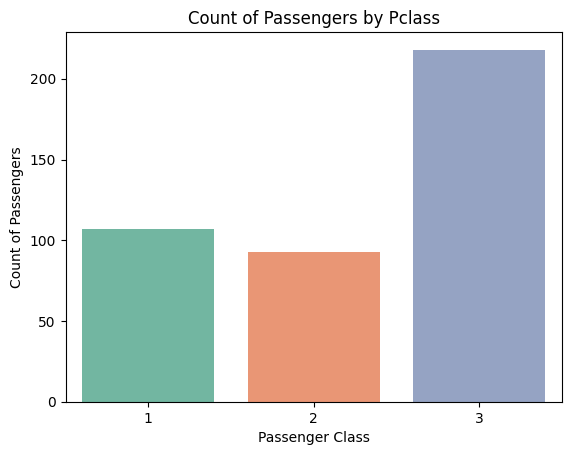

In [21]:
pclass_barplot=sns.countplot(data=df_main,x='Pclass',palette='Set2')
plt.title('Count of Passengers by Pclass')
plt.xlabel("Passenger Class")
plt.ylabel("Count of Passengers")

C:\Users\ayaal\AppData\Local\Temp\ipykernel_9296\3912615144.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sex_barplot=sns.countplot(data=df_main,x='Sex',palette="coolwarm")


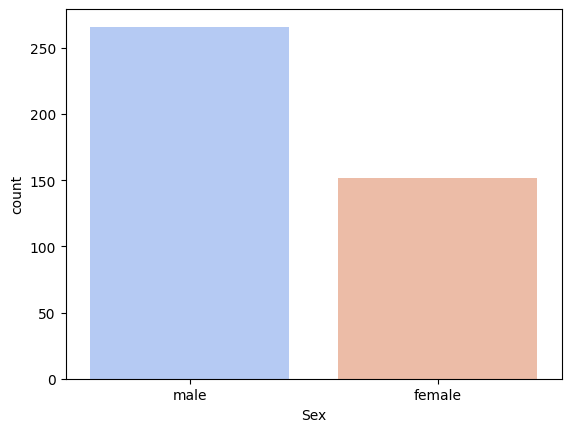

In [22]:
sex_barplot=sns.countplot(data=df_main,x='Sex',palette="coolwarm")

In [23]:
sex_count=df_main['Sex'].value_counts()
sex_count

Sex
male      266
female    152
Name: count, dtype: int64

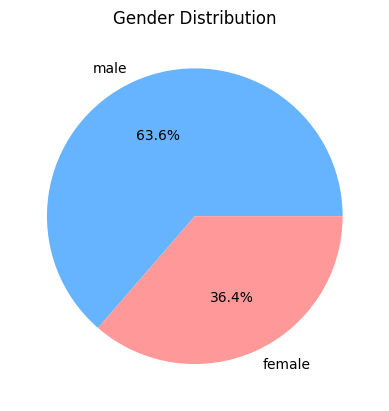

In [24]:
plt.pie(sex_count,labels=sex_count.index,autopct='%1.1f%%',colors=['#66b3ff','#ff9999'])
plt.title("Gender Distribution")
plt.show()

Text(0, 0.5, 'Frequency')

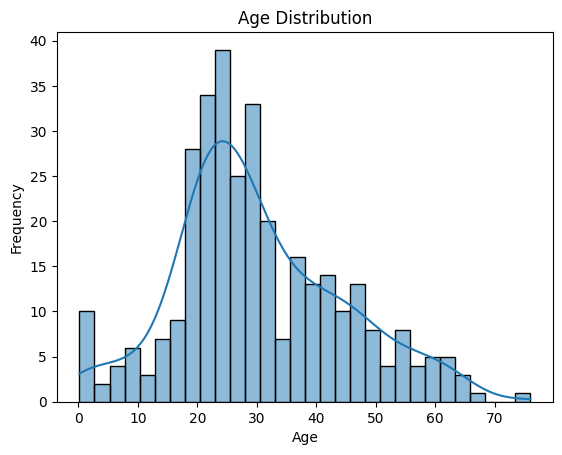

In [25]:
sns.histplot(data=df_main , x='Age',bins=30,kde=True
             )
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

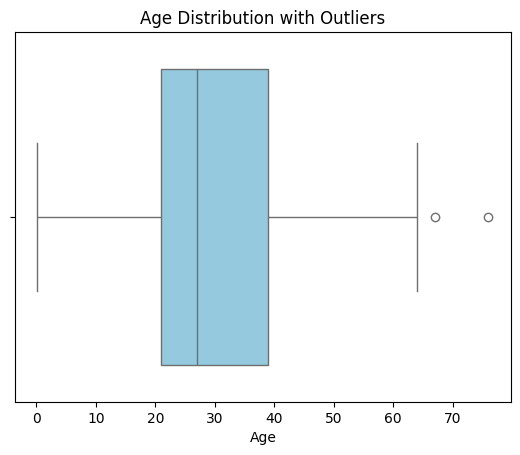

In [26]:
sns.boxplot(x=df['Age'],color='skyblue')
plt.title('Age Distribution with Outliers')
plt.xlabel('Age')
plt.show()


Text(0, 0.5, 'Frequency')

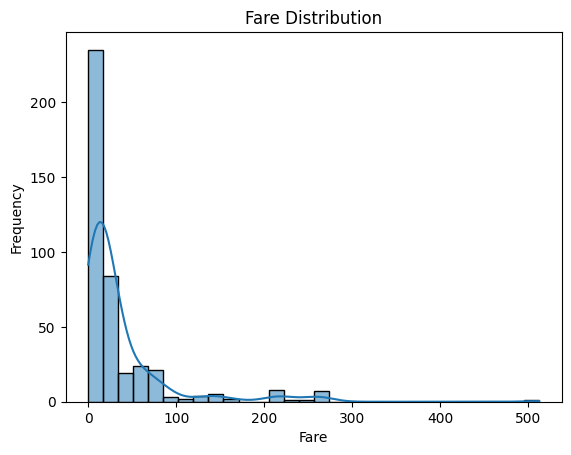

In [27]:
sns.histplot(data=df_main , x='Fare',bins=30,kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')

C:\Users\ayaal\AppData\Local\Temp\ipykernel_9296\1626064028.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_main,x='Embarked',palette='pastel')


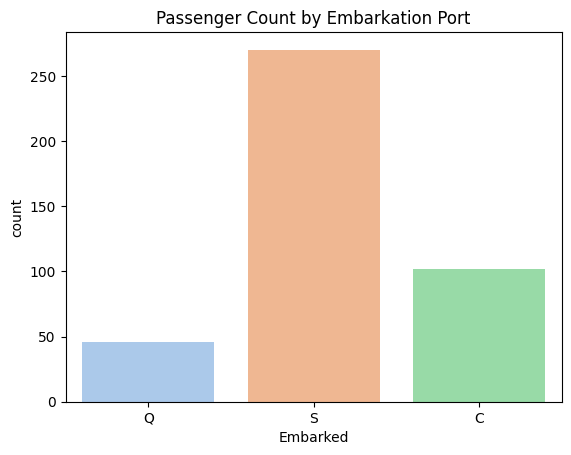

In [28]:

sns.countplot(data=df_main,x='Embarked',palette='pastel')
plt.title('Passenger Count by Embarkation Port')
plt.xlabel('Embarked')
plt.ylabel('count')
plt.show()

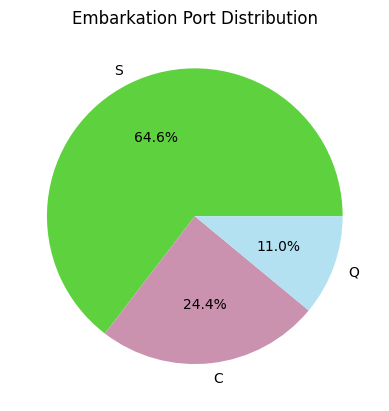

In [29]:
embarked_count = df['Embarked'].value_counts()
plt.pie(embarked_count,labels=embarked_count.index,autopct='%1.1f%%', colors=["#5ED13E","#CB92B0","#B4E1F1"])
plt.title('Embarkation Port Distribution')
plt.show()


In [30]:
Total =df_main['Cabin'].shape[0]
print("Total number of cabins: ",Total)
Missing =df_main['Cabin'].isnull().sum()
print("Missing Cabin: ",Missing)
existing=Total-Missing
print("Existing Cabin: ",existing)


Total number of cabins:  418
Missing Cabin:  327
Existing Cabin:  91


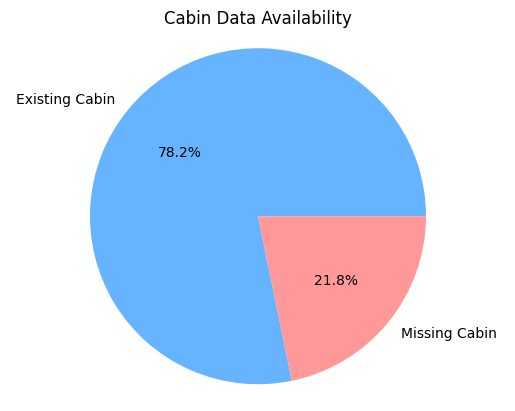

In [31]:

labels = ['Existing Cabin', 'Missing Cabin']
data = [Missing, existing]

plt.pie(data, labels=labels, autopct='%1.1f%%', colors= ['#66b3ff', '#ff9999'])
plt.title('Cabin Data Availability')
plt.axis('equal')
plt.show()


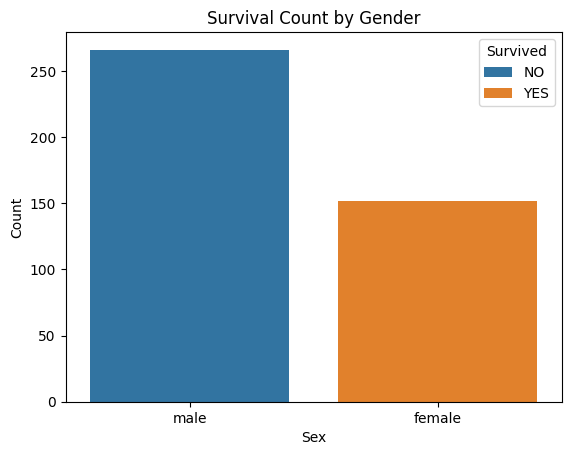

In [32]:
sns.countplot(data=df_main,x='Sex',hue='Survived')
plt.title("Survival Count by Gender")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title='Survived',labels=['NO','YES'])
plt.show()


Females had a much higher survival rate than males.

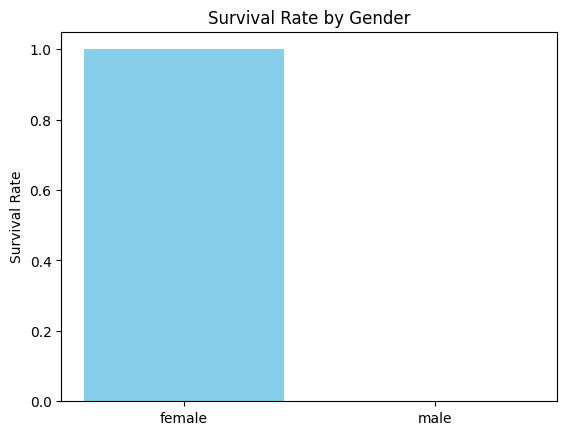

In [33]:
gender_survived=df.groupby('Sex')['Survived'].mean()
plt.bar(gender_survived.index,gender_survived.values, color=['skyblue', 'lightpink'])
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()


Females had a much higher survival rate than males.

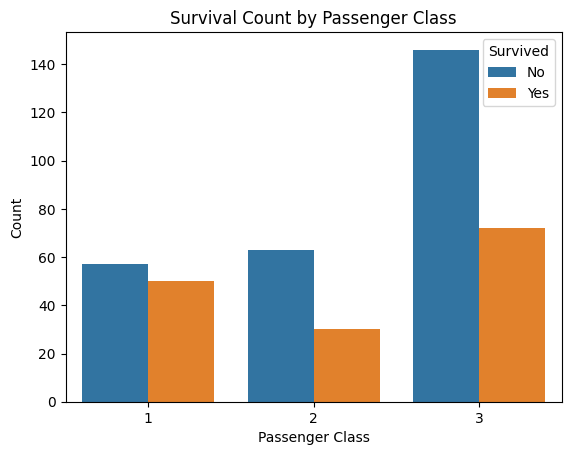

In [34]:
sns.countplot(data=df_main,x='Pclass',hue='Survived')
plt.title("Survival Count by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


First-class passengers had the highest survival rate.

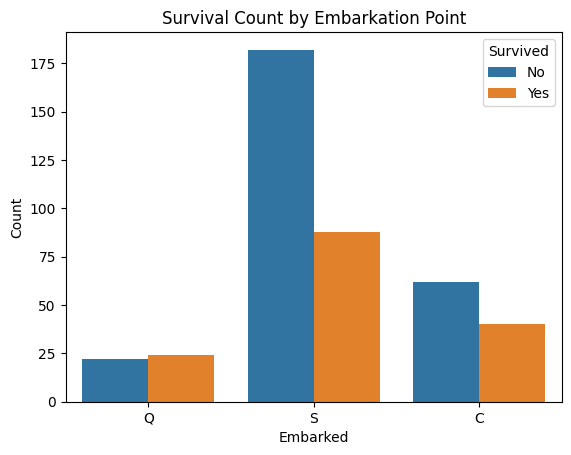

In [35]:
sns.countplot(data=df_main,x='Embarked',hue='Survived')
plt.title("Survival Count by Embarkation Point")
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

Passengers who embarked from c had the highest survival rate

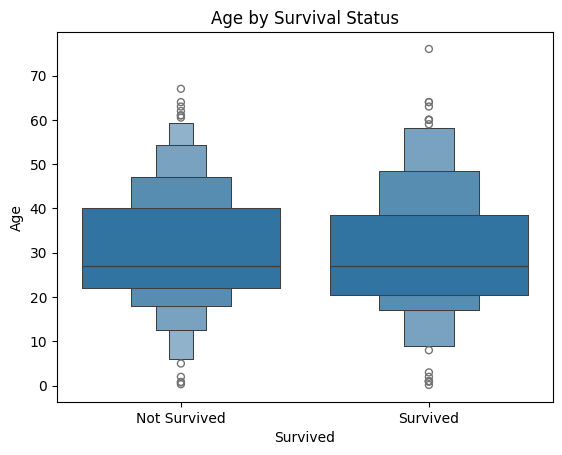

In [36]:
sns.boxenplot(data=df_main,x='Survived',y='Age')
plt.title("Age by Survival Status")
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()


Children had relatively higher survival rates

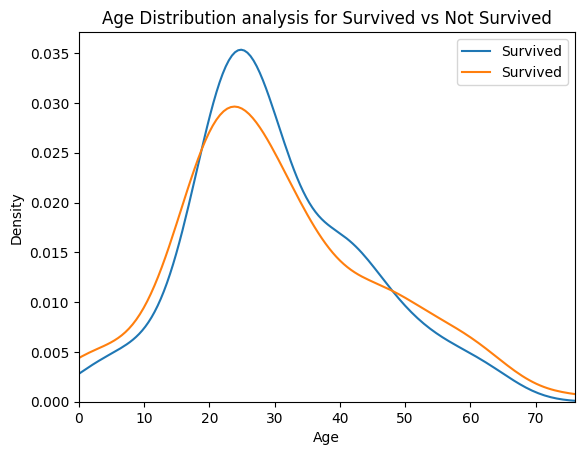

In [37]:
sns.kdeplot(data=df_main[df_main['Survived']==0]['Age'],label='Survived')
sns.kdeplot(data=df_main[df_main['Survived']==1]['Age'],label='Survived')
plt.title("Age Distribution analysis for Survived vs Not Survived")
plt.xlabel("Age")
plt.xlim(0, df_main['Age'].max())
plt.legend()
plt.show()


Children had relatively higher survival rates

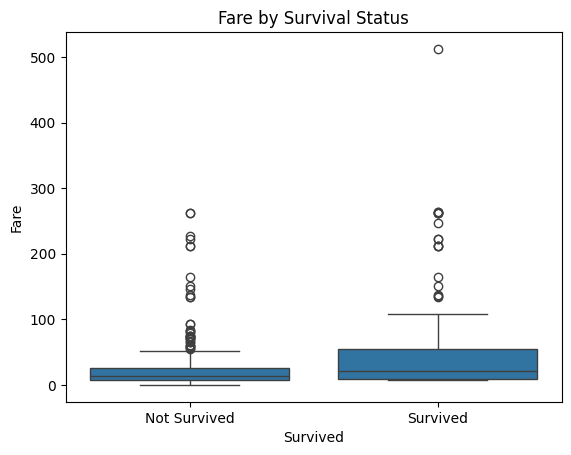

In [38]:
sns.boxplot(data=df_main,x='Survived',y='Fare')
plt.title("Fare by Survival Status")
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()


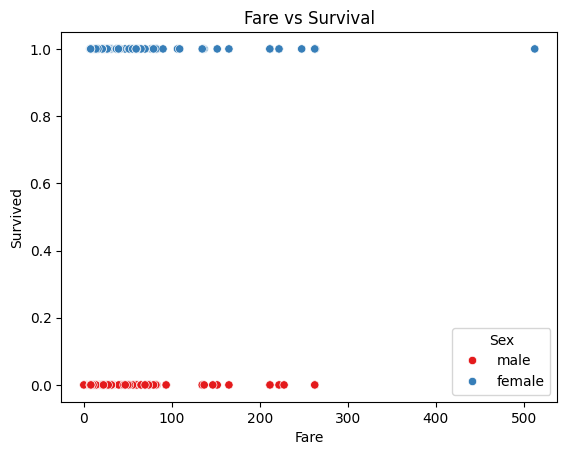

In [39]:
sns.scatterplot(data=df_main,x='Fare', y='Survived', hue='Sex', palette='Set1')
plt.title("Fare vs Survival")
plt.xlabel("Fare")
plt.ylabel("Survived")
plt.show()

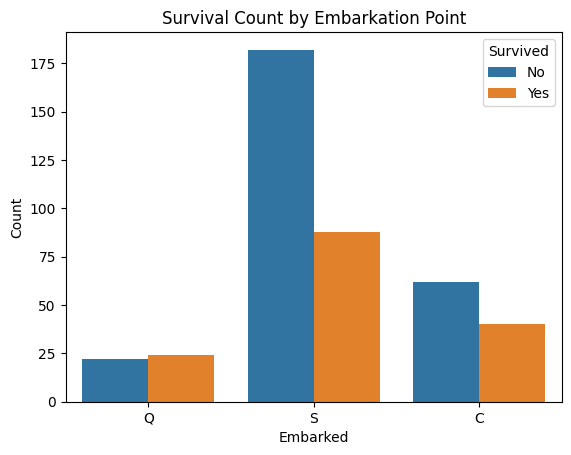

In [40]:
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title("Survival Count by Embarkation Point")
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

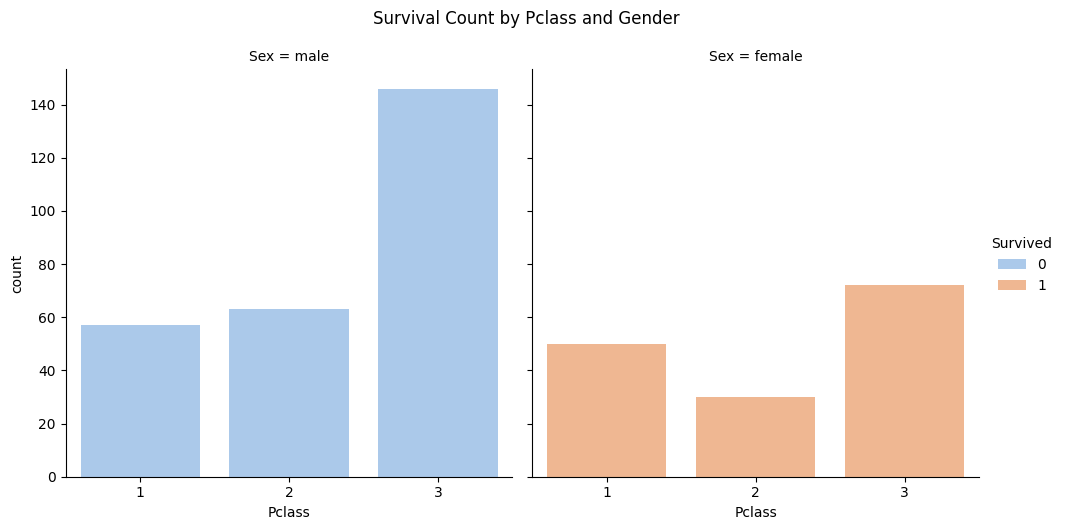

In [ ]:
sns.catplot(data=df_main,col='Sex',x="Pclass",hue='Survived',kind="count" ,palette="pastel" )
plt.suptitle("Survival Count by Pclass and Gender",y=1.05)
plt.show()


In [ ]:
fig_catplot = px.histogram(df_main,x="Pclass", color="Survived", facet_col="Sex", barmode="group", color_discrete_sequence=px.colors.qualitative.Pastel
)

fig_catplot.update_layout( title_text="Survival Count by Pclass and Gender", title_x=0.5
)

fig_catplot.show()

In [42]:
fig_scatterplot = px.scatter(data_frame=df_main,x='Age', y='Fare',color='Survived', opacity=0.6, color_discrete_sequence=px.colors.qualitative.Set1, hover_data=df_main.columns
)
fig_scatterplot.update_layout(title="Age vs Fare Colored by Survival")
fig_scatterplot.show()

In [ ]:
fig_violin = px.violin(df_main,x='Sex',y='Age',color='Survived', box=True,points='all',hover_data=df_main.columns,
)
fig_violin.update_layout(title="Age Distribution by Sex and Survival")
fig_violin.show()  


females had significantly higher survival rates across most age groups, especially in younger ages, while males had lower survival probabilities regardless of age.

In [47]:
from dash import Dash, dcc, html
import plotly.express as px
import pandas as pd

fig_violin = px.violin(
    df_main,
    x='Sex',
    y='Age',
    color='Survived',
    box=True,
    points='all',
    hover_data=df_main.columns,
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig_violin.update_layout(title="Age Distribution by Sex and Survival")

fig_catplot = px.histogram(
    df_main,
    x="Pclass",
    color="Survived",
    facet_col="Sex",
    barmode="group",
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig_catplot.update_layout(
    title_text="Survival Count by Pclass and Gender",
    title_x=0.5
)


fig_scatterplot = px.scatter(
    data_frame=df_main,
    x='Age',
    y='Fare',
    color='Survived',
    opacity=0.6,
    color_discrete_sequence=px.colors.qualitative.Set1,
    hover_data=df_main.columns
)
fig_scatterplot.update_layout(title="Age vs Fare Colored by Survival")

app = Dash(__name__)

app.layout = html.Div(
    style={
        'fontFamily': 'Arial, sans-serif',
        'backgroundColor': '#f5f5f5',
        'padding': '40px'
    },
    children=[
        html.Div([
            html.H1(
                "Titanic Data Visualizations",
                style={
                    'textAlign': 'center',
                    'color': '#222',
                    'marginBottom': '30px'
                }
            ),

            dcc.Graph(
                figure=fig_violin,
                style={
                    'boxShadow': '0 4px 12px rgba(0, 0, 0, 0.1)',
                    'borderRadius': '10px',
                    'padding': '10px',
                    'backgroundColor': 'white',
                    'marginBottom': '40px'
                }
            ),

            dcc.Graph(
                figure=fig_scatterplot,
                style={
                    'boxShadow': '0 4px 12px rgba(0, 0, 0, 0.1)',
                    'borderRadius': '10px',
                    'padding': '10px',
                    'backgroundColor': 'white'
                }
            ),
            dcc.Graph(
                figure=fig_catplot,
                style={
                    'boxShadow': '0 4px 12px rgba(0, 0, 0, 0.1)',
                    'borderRadius': '10px',
                    'padding': '10px',
                    'backgroundColor': 'white'
                }
            )
        ], style={
            'maxWidth': '1000px',
            'margin': '0 auto',
            'padding': '20px',
            'backgroundColor': '#ffffff',
            'borderRadius': '12px',
            'boxShadow': '0 6px 18px rgba(0, 0, 0, 0.1)'
        })
    ]
)

if __name__ == '__main__':
  app.run(debug=True, port=8051)


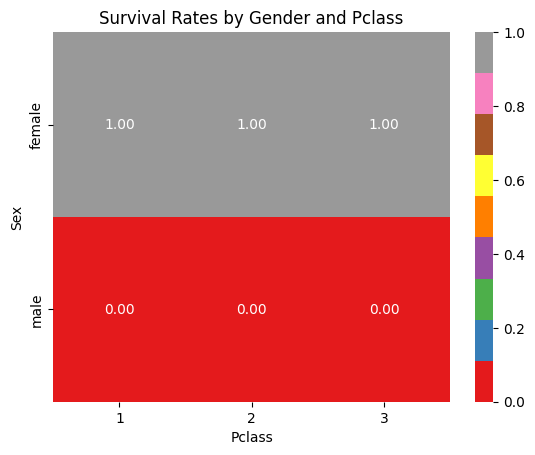

In [ ]:
pivot = df.pivot_table(values="Survived", index="Sex", columns="Pclass")
sns.heatmap(pivot, annot=True, cmap="Set1", fmt=".2f")
plt.title("Survival Rates by Gender and Pclass")
plt.show()
